## 異なる強さの正則化(多項式回帰)

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

### サンプルデータ１(多項式回帰)

<>:59: SyntaxWarning: invalid escape sequence '\l'
<>:59: SyntaxWarning: invalid escape sequence '\l'
C:\Users\bsksh\AppData\Local\Temp\ipykernel_7908\4103398607.py:59: SyntaxWarning: invalid escape sequence '\l'
  ax[0].plot(x, y_pred[:,i],  lw=0.5, label=f"$\lambda =${lambda_range[i]}")


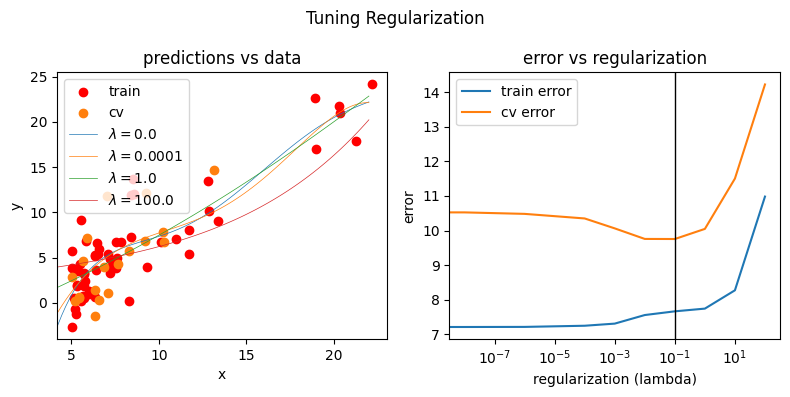

In [ ]:
#データの読み込み
data = pd.read_csv("data/ex1data1.txt")
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=1)
# X.shape (40,) y.shape (40,)
# X_train.shape (24,) y_train.shape (24,)
# X_cv.shape (8,) y_cv.shape (8,)
# X_test.shape (8,) y_test.shape (8,)

lambda_range = np.array([0.0, 1e-8, 1e-6, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
num_steps = len(lambda_range)
degree = 5
err_train = np.zeros(num_steps)    #トレーニング誤差
err_cv = np.zeros(num_steps)       #検証誤差
x = np.linspace(0,int(X.max()),100) #x軸１００等分
y_pred = np.zeros((100,num_steps))  #shape = (100,num_steps)
                                    #Input(shape=(100,)
#多項式回帰
for i in range(num_steps):
    lambda_ = lambda_range[i]
    lmodel = make_pipeline(
        PolynomialFeatures(degree),
        StandardScaler(),
        Ridge(alpha=lambda_, solver='auto')  
    )
    lmodel.fit(X_train, y_train)  # 学習

    # 予測と誤差計算
    yhat_train = lmodel.predict(X_train)
    err_train[i] = np.mean((yhat_train - y_train) ** 2)

    yhat_cv = lmodel.predict(X_cv)
    err_cv[i] = np.mean((yhat_cv - y_cv) ** 2)

    y_pred[:, i] = lmodel.predict(x.reshape(-1, 1))  # xは1次元なのでreshape


fig, ax = plt.subplots(1,2,figsize=(8,4))
fig.suptitle("Tuning Regularization",fontsize = 12)

#比較表示(予測)
ax[0].set_title("predictions vs data",fontsize = 12)
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

ax[0].scatter(X_train, y_train, color = "red", label="train")
ax[0].scatter(X_cv, y_cv, color = dlc["dlorange"], label="cv")

ax[0].set_xlim(ax[0].get_xlim()) #後から追加する線のせいで軸が勝手に変わるのを防ぐ
ax[0].set_ylim(ax[0].get_ylim()) #set(min,max)

for i in (0,3,7,9):
    ax[0].plot(x, y_pred[:,i],  lw=0.5, label=f"$\lambda =${lambda_range[i]}")
ax[0].legend()


#比較表示(損失)
ax[1].set_title("error vs regularization",fontsize = 12)
ax[1].plot(lambda_range, err_train[:], label="train error", color = dlc["dlblue"])
ax[1].plot(lambda_range, err_cv[:],    label="cv error",    color = dlc["dlorange"])
ax[1].set_xscale('log') #x軸対数に
ax[1].set_ylim(*ax[1].get_ylim())
optimal_reg_idx = np.argmin(err_cv) #err_cvのmin
opt_x = lambda_range[optimal_reg_idx]
#垂直線(x,長さ,...)
ax[1].vlines(opt_x, *ax[1].get_ylim(), color = "black", lw=1)

ax[1].set_xlabel("regularization (lambda)")
ax[1].set_ylabel("error")
ax[1].legend(loc='upper left')
plt.tight_layout()
plt.show()

### サンプルデータ2(ニューラルネットワーク)

C:\Users\bsksh\AppData\Local\Temp\ipykernel_7908\2142071492.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\bsksh\AppData\Local\Temp\ipykernel_7908\2142071492.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Finished lambda = 1e-10
Finished lambda = 1e-08
Finished lambda = 1e-06
Finished lambda = 0.001
Finished lambda = 0.1


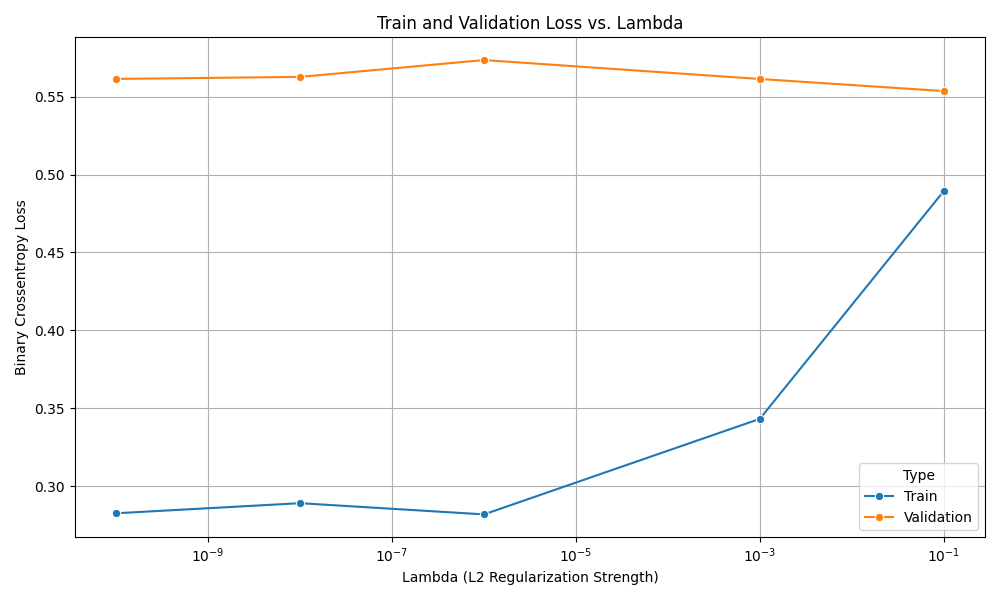

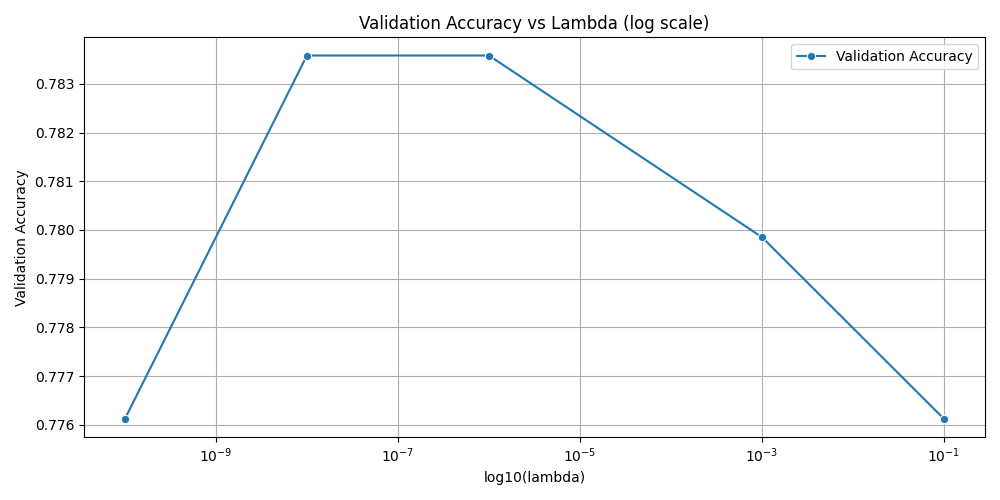

In [14]:
# データの読み込み
df = pd.read_csv("data/train.csv")

# 欠損値の処理
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# カテゴリ変数のエンコーディング
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# 特徴量と目的変数の設定
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

# データの分割
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=1)


# 特徴量の標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_cv = scaler.transform(X_cv)

tf.random.set_seed(1234)
lambdas = [1e-10 ,1e-8, 1e-6, 1e-3, 1e-1]
models = []
train_losses = []
val_losses = []
val_accuracies = []


for lambda_ in lambdas:
    model = Sequential([
        Dense(80, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_), input_shape=(8,)),
        Dense(30, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_cv, y_cv) , verbose=0)
    models.append(model)
    train_losses.append(history.history['loss'][-1])
    val_losses.append(history.history['val_loss'][-1])
    val_accuracies.append(history.history['val_accuracy'][-1])
    print(f"Finished lambda = {lambda_}")

# 損失をデータフレームにまとめる
df_loss = pd.DataFrame({
    'Lambda': lambdas * 2,  # 各 lambda が 2 回（train, val）出てくる
    'Loss': train_losses + val_losses,
    'Type': ['Train'] * len(lambdas) + ['Validation'] * len(lambdas)
})

import seaborn as sns
# グラフ描画
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_loss, x='Lambda', y='Loss', hue='Type', marker='o')
plt.xticks(lambdas, labels=[str(l) for l in lambdas])  # 軸のラベルをそのまま表示
plt.xscale('log')
plt.title('Train and Validation Loss vs. Lambda')
plt.xlabel('Lambda (L2 Regularization Strength)')
plt.ylabel('Binary Crossentropy Loss')
plt.grid(True)
plt.tight_layout()
plt.show()

# 正答率グラフ（Validation Accuracy のみ、横軸は log10(lambda)）
plt.figure(figsize=(10, 5))
sns.lineplot(x=lambdas, y=val_accuracies, label='Validation Accuracy', marker='o')
plt.xscale('log')
plt.xlabel("log10(lambda)")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs Lambda (log scale)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

